## 🧩 Digit Recognition using Logistic Regression 91%
<hr style="height:2px; background-color:black; border:none;">

## 📜 Notebook Structure

>### 📦 Importing Libraries
> ```python
> import necessary libraries
> ```
>### 📥 Loading the Data
>### 🏗️ Preparing the Data for Training
> ```python
> # 🔍 Splitting Data into Features (X) and Labels (y)
># ⚖️ Standardizing the Data
>StandardScaler()
># ✂️ Splitting Data into Training and Testing Sets
> ```
>
>### 🎯 Training the Model
>```python
>LogisticRegression(max_iter=1000)
>```
>
>### 📊 Evaluating the Model
>```python
>y_pred = model.predict(X_test)
>accuracy = accuracy_score(y_test, y_pred)
>conf_matrix = confusion_matrix(y_test, y_pred)
>```
>
>### 🔄 Training on the Full Dataset
>```python
>model.fit(X, y)
>```
>
>### 🆕 Testing on Unseen Data
>```python
>logistic_results.to_csv("submission.csv", index=False)
>```

#### 📦 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

#### 📥 Loading the Data

In [2]:
train = pd.read_csv('train.csv')

#### 🏗️ Preparing the Data for Training

In [3]:
# 🔍 Splitting Data into Features (X) and Labels (y)
X = train.drop(columns=['label']) 
y = train['label'] 

# ⚖️ Standardizing the Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ✂️ Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=64)

#### 🎯 Training the Model

In [4]:
model = LogisticRegression(random_state=65, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=65)

#### 📊 Evaluating the Model

In [5]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Classification report for better insight
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1388
           1       0.94      0.97      0.95      1461
           2       0.86      0.87      0.87      1351
           3       0.89      0.86      0.88      1400
           4       0.90      0.91      0.91      1357
           5       0.86      0.86      0.86      1294
           6       0.92      0.92      0.92      1414
           7       0.93      0.91      0.92      1431
           8       0.87      0.86      0.86      1357
           9       0.88      0.89      0.88      1407

    accuracy                           0.90     13860
   macro avg       0.90      0.90      0.90     13860
weighted avg       0.90      0.90      0.90     13860



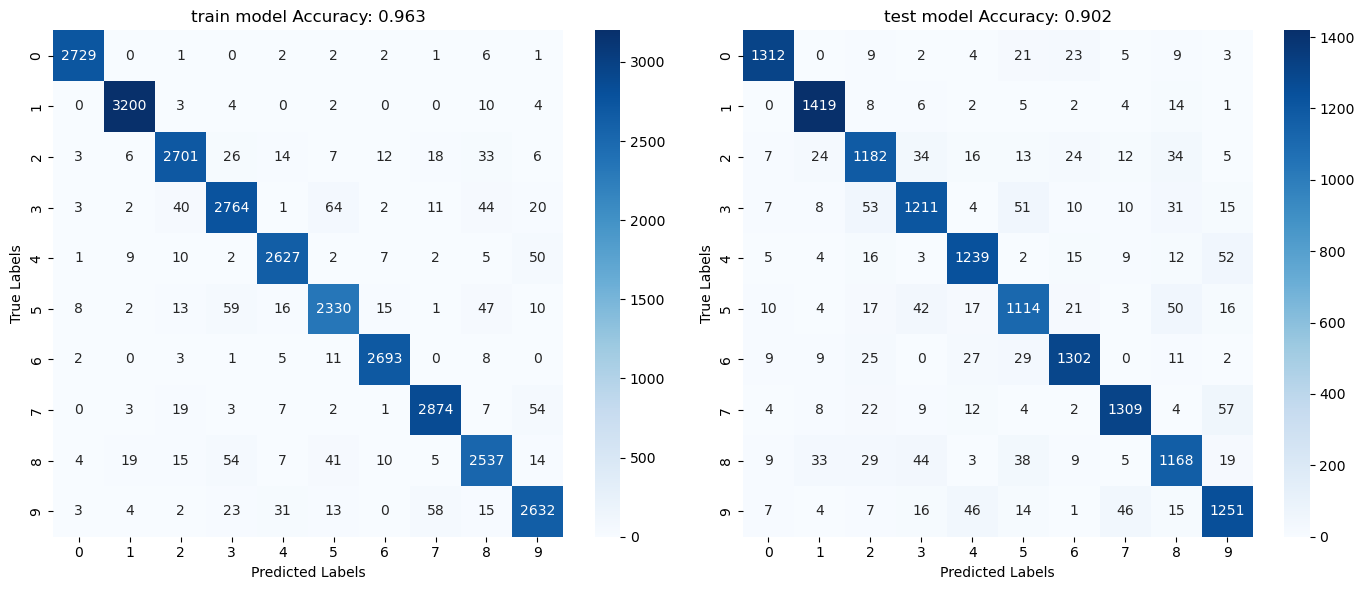

In [6]:
# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Plotting the confusion matrix and accuracy
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix for Train Data
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, cmap="Blues", annot=True, fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y), ax=ax[0])
ax[0].set_title(f"train model Accuracy: {train_accuracy:.3f}")
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# Confusion Matrix for Test Data
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, cmap="Blues", annot=True, fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y), ax=ax[1])
ax[1].set_title(f"test model Accuracy: {test_accuracy:.3f}")
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

# Show the plot
plt.tight_layout()
plt.show()

#### 🔄 Training on the Full Dataset

In [7]:
model.fit(X, y)

LogisticRegression(max_iter=1000, random_state=65)

#### 🆕 Testing on Unseen Data

In [8]:
#test dataset
test = pd.read_csv('test.csv')

# Scale the test data (use scaler fitted on training data)
test = scaler.transform(test)

# Predict with the trained model
logistic_predictions = model.predict(test)

# Prepare results for submission
logistic_results = pd.DataFrame({'ImageId': range(1, len(logistic_predictions) + 1), 'Label': logistic_predictions})
logistic_results.to_csv("submission.csv", index=False)